In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import Series,DataFrame
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib
from sklearn import  model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

Using matplotlib backend: Qt5Agg


In [2]:
Data=pd.read_csv('glass.csv')

In [3]:
Data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516523,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


In [5]:
Data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

C:\Users\HEMNATH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


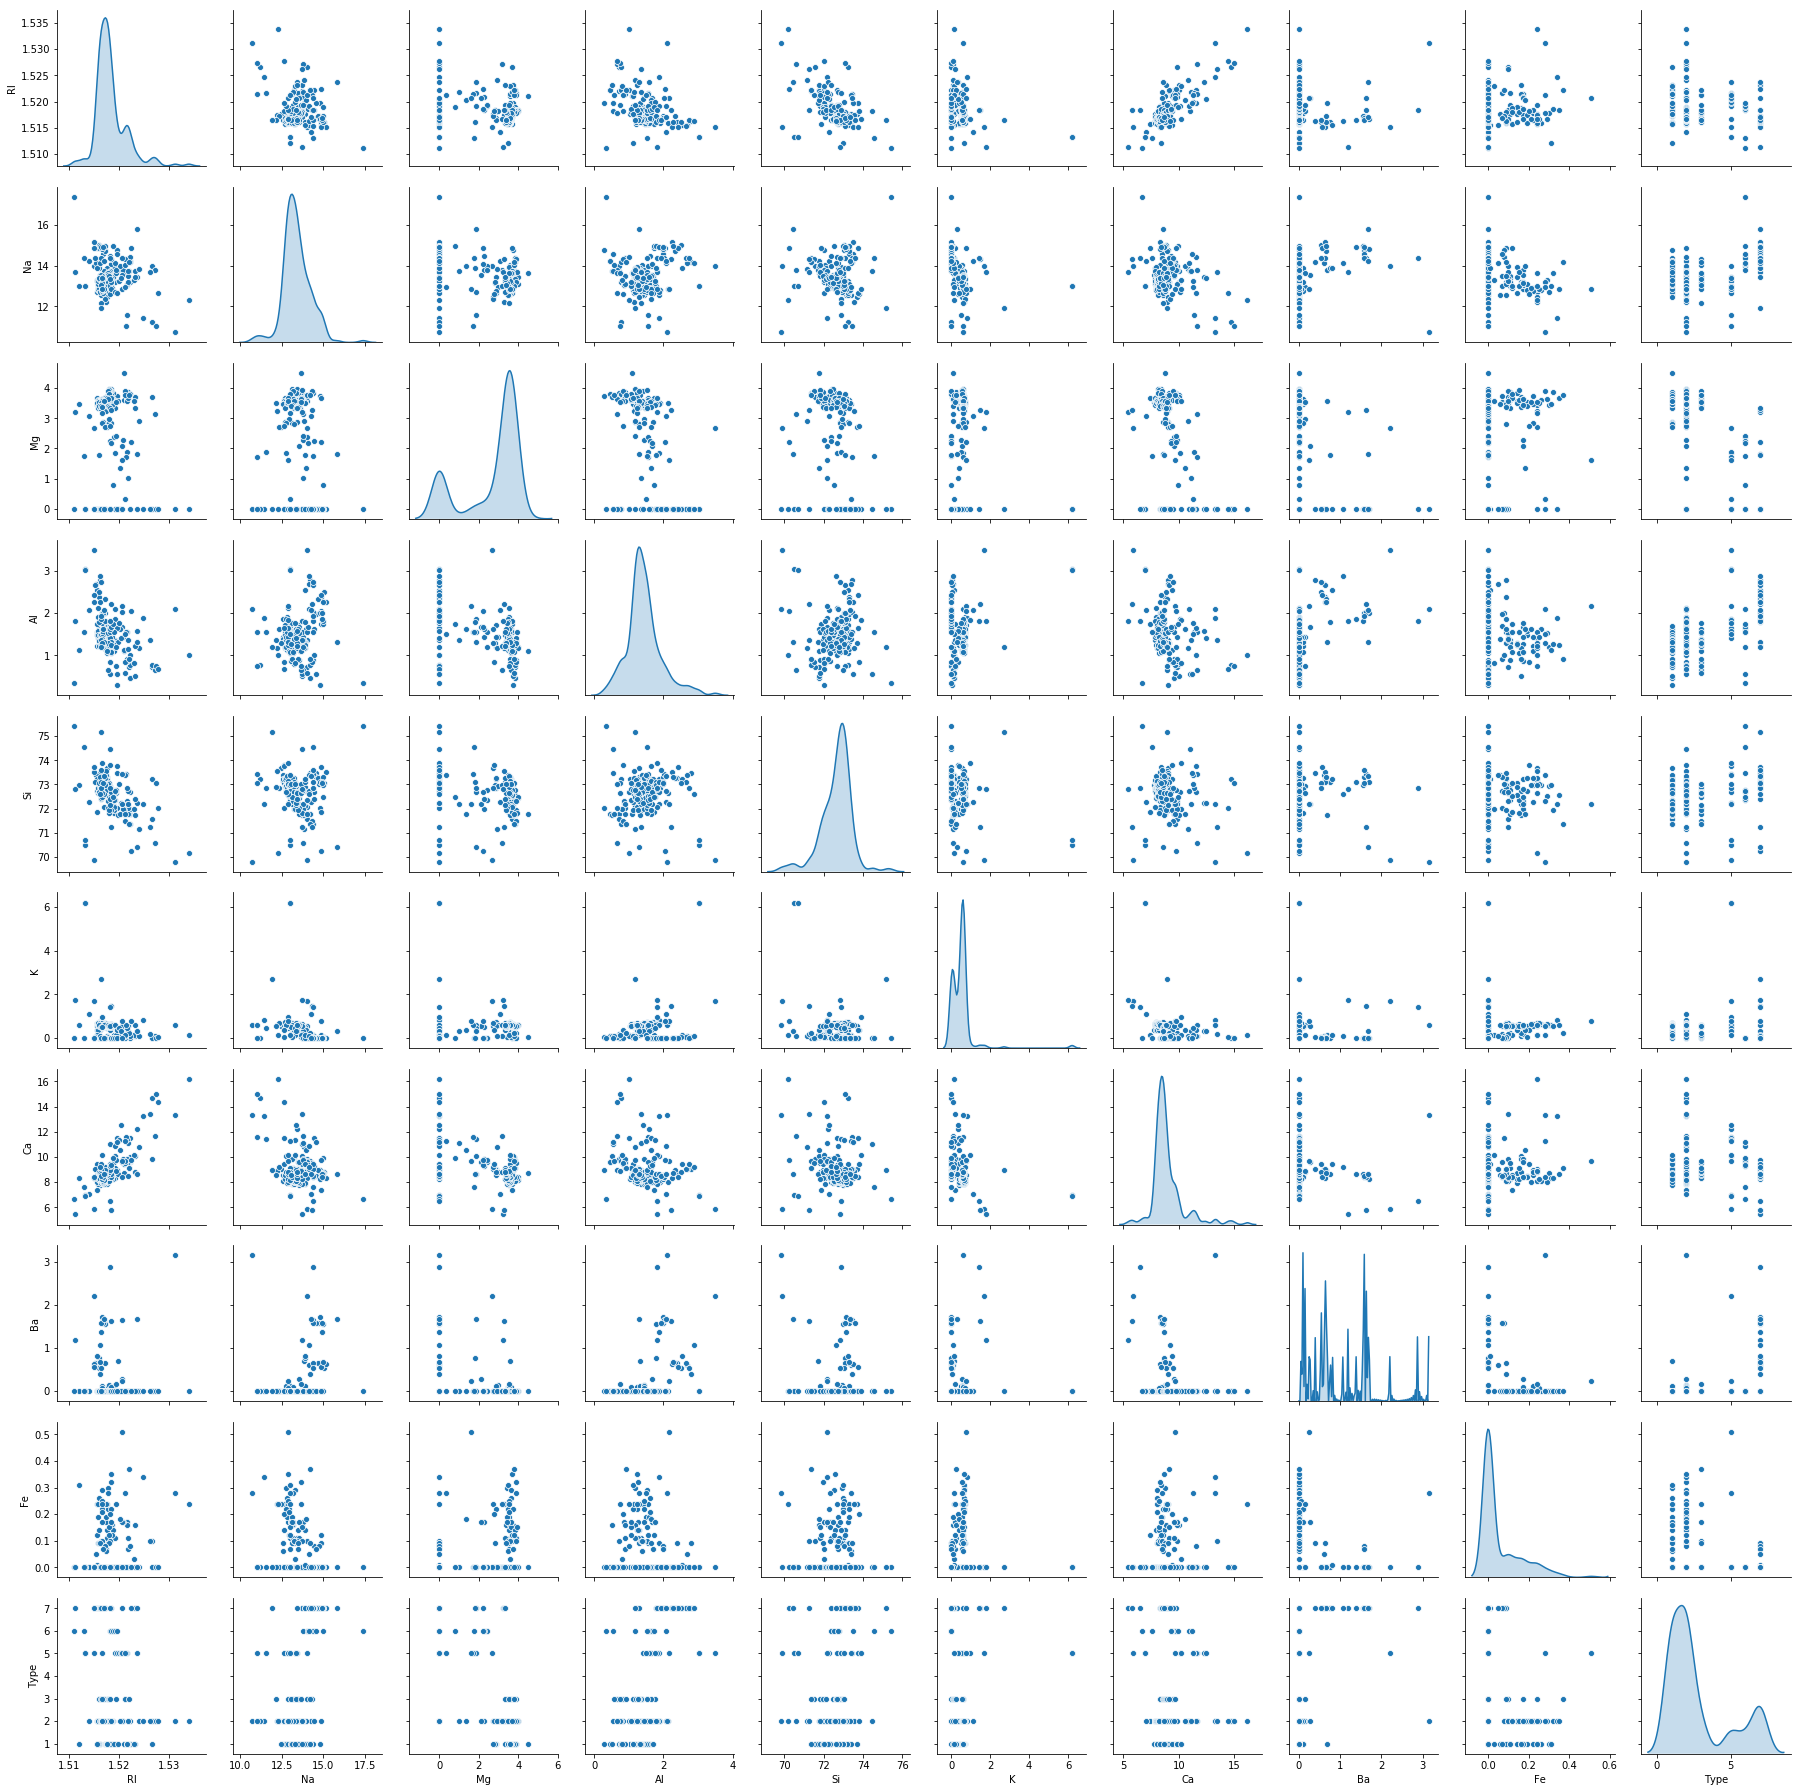

In [6]:
sns.pairplot(Data,diag_kind='kde')
plt.show()

In [7]:
Data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [8]:
Data.Type=Data.Type.astype('category')

In [9]:
Data.dtypes

RI       float64
Na       float64
Mg       float64
Al       float64
Si       float64
K        float64
Ca       float64
Ba       float64
Fe       float64
Type    category
dtype: object

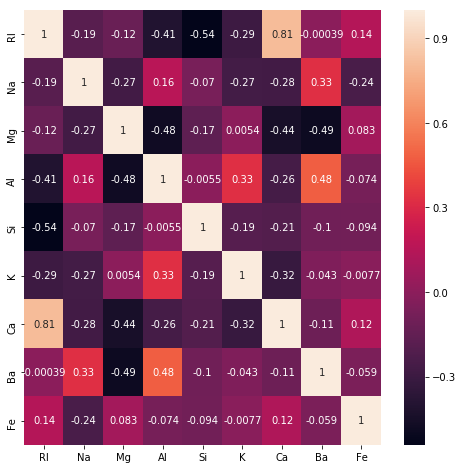

In [10]:
plt.figure(figsize=[8,8])
sns.heatmap(Data.corr(),annot=True)
plt.show()

# outlier Detection

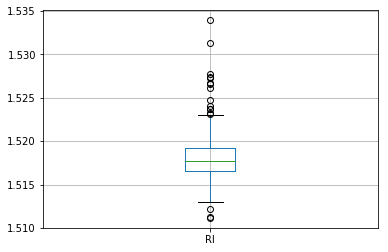

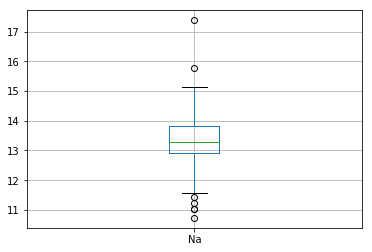

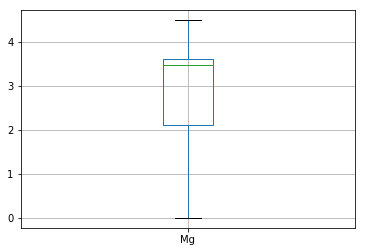

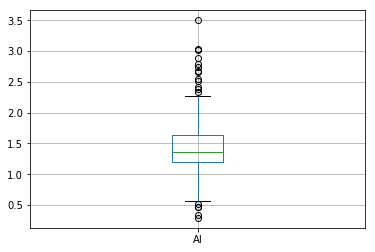

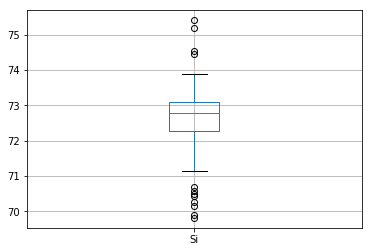

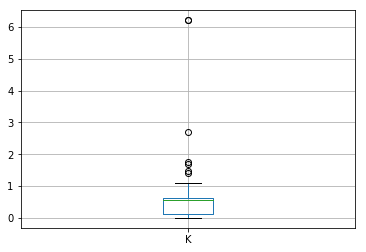

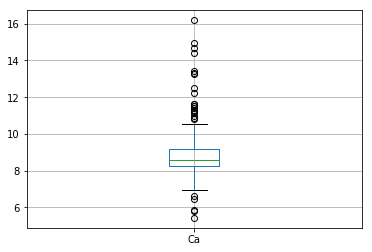

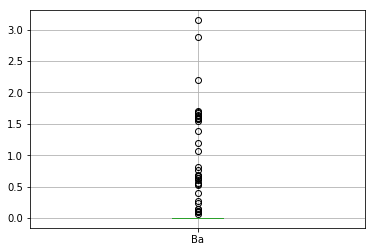

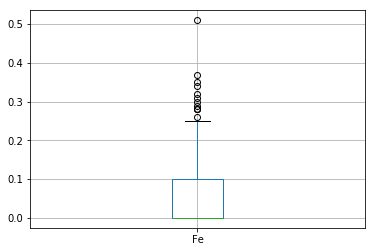

In [11]:
for column in Data.columns:
    if column!='Type':
        plt.figure()
        Data.boxplot([column])

In [12]:
Data.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [13]:
x=Data.drop('Type',axis=1)
y=Data.Type

In [14]:
x_std=StandardScaler().fit_transform(x)

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x_std,y,test_size=0.3,random_state=1)

# Getting parameter using Gridsearch 

In [16]:
model_dtgd=DecisionTreeClassifier(random_state=0)
parameter_dtgd={'max_depth':np.arange(1,10)}
model_rfgd=RandomForestClassifier(random_state=0)
parameter_rfgd={'n_estimators':np.arange(1,50),'max_depth':np.arange(1,10)}
model_knngd=KNeighborsClassifier(weights='uniform',metric='euclidean')
parameter_knngd={'n_neighbors':np.arange(1,15)}

In [17]:
grid_dt=GridSearchCV(model_dtgd,parameter_dtgd,cv=5)
grid_dt.fit(x,y)
grid_dt.best_params_

C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 9}

In [18]:
grid_knn=GridSearchCV(model_knngd,parameter_knngd,cv=5)
grid_knn.fit(x,y)
grid_knn.best_params_

C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 1}

In [19]:
grid_rf=GridSearchCV(model_rfgd,parameter_rfgd,cv=5)
grid_rf.fit(x,y)
grid_rf.best_params_

C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 9, 'n_estimators': 46}

# Fitting the Model

In [20]:
model_dt=DecisionTreeClassifier(max_depth=9,random_state=0)
model_dt.fit(x_train,y_train)
y_pre_dt=model_dt.predict(x_test)

model_knn=KNeighborsClassifier(n_neighbors= 1)
model_knn.fit(x_train,y_train)
y_pred_knn=model_knn.predict(x_test)

model_rf=RandomForestClassifier(max_depth= 9, n_estimators= 46,criterion='entropy',random_state=0)
model_rf.fit(x_train,y_train)
y_pred_rf=model_rf.predict(x_test)

model_lr=LogisticRegression()
model_lr.fit(x_train,y_train)
y_pred_lr=model_lr.predict(x_test)

C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [21]:
mod=[]
mod.append(('Decision Tree',model_dt))
mod.append(('KNN',model_knn))
mod.append(('Random Forest',model_rf))
mod.append(('Logistic Regression',model_lr))

results=[]
names=[]
scoring='accuracy'
for name,model in mod:
    kfold=model_selection.KFold(n_splits=10,random_state=2)
    cv_results=model_selection.cross_val_score(model,x_std,y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg='%s:%f(%f)'%(name,cv_results.mean(),cv_results.std())
    print(msg)

Decision Tree:0.485065(0.214848)
KNN:0.558658(0.213123)
Random Forest:0.575758(0.287025)
Logistic Regression:0.345671(0.135024)


C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: 

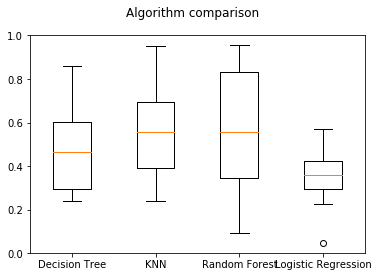

In [22]:
fig=plt.figure()
fig.suptitle('Algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [23]:
mod=[]
mod.append(('Decision Tree',model_dt))
mod.append(('KNN',model_knn))
mod.append(('Random Forest',model_rf))
mod.append(('Logistic Regression',model_lr))

results=[]
names=[]
scoring='accuracy'
for name,model in mod:
    kfold=model_selection.KFold(n_splits=10,random_state=2,shuffle=True)
    cv_results=model_selection.cross_val_score(model,x_std,y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg='%s:%f(%f)'%(name,cv_results.mean(),cv_results.std())
    print(msg)

Decision Tree:0.645238(0.118580)
KNN:0.705195(0.085949)
Random Forest:0.804329(0.070206)
Logistic Regression:0.631169(0.129755)


C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: 